<a href="https://colab.research.google.com/github/jbarnesspain/multitask_negation_for_targeted_sentiment/blob/master/Multi_task_detailed_sentiment_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

matplotlib.rc('font', size=14)
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from typing import List
import copy
def create_quad_plot(data_df: pd.DataFrame, metric_names: List[str], y_axis: str) -> List[List[plt.Axes]]:
  fig, axes = plt.subplots(2,2,figsize=(15,10))
  dataset_list_order = [['Restaurant', 'MAMS'],['Laptop', 'MPQA']]
  for row_index, dataset_name_list in enumerate(dataset_list_order):
    for col_index, dataset_name in enumerate(dataset_name_list):
      df = data_df[data_df['Dataset']==dataset_name]
      temp_metric_names = copy.deepcopy(metric_names)
      if dataset_name != 'MAMS' and 'DS3' in temp_metric_names:
        temp_metric_names.remove('DS3')
      df = df[df['Metric Name'].isin(temp_metric_names)]
      axes[row_index][col_index] = sns.pointplot(join=False, dodge=0.8, ci='sd',
                                                 y=f'{y_axis}', hue='Model',
                                                 x='Metric Name', data=df,
                                                 ax=axes[row_index][col_index])
      axes[row_index][col_index].set_title(f'{dataset_name}')
      if row_index == 0:
        axes[row_index][col_index].set_xlabel('')
      if col_index == 1:
        axes[row_index][col_index].set_ylabel('')
      if row_index != 0 or col_index == 1:
        axes[row_index][col_index].get_legend().remove()
      else:
        axes[row_index][col_index].legend(ncol=7, borderaxespad=0.,
                                          bbox_to_anchor=(0.18, 1.1), 
                                          loc='lower left')
  return axes

In [0]:
detailed_sentiment_results_url = 'https://raw.githubusercontent.com/jbarnesspain/multitask_negation_for_targeted_sentiment/master/data/results/detailed_sentiment_results.json'
response = requests.get(detailed_sentiment_results_url)
detailed_sentiment_results = response.json()

Below we can see all of the detailed results. The results are for all models, the two different embeddings (GloVe and CWR), the four different datasets, and the 4 new detailed metrics (DS1, DS2, DS3, and STAC). Where the STAC here are only for samples in the dataset that have at least two different distinct sentiments in the sentence, where the targets were predicted correctly.

In [4]:
results_df = pd.DataFrame(detailed_sentiment_results)
results_df['Dataset'] = results_df['Dataset'].replace(['laptop', 'restaurant', 'mpqa'], ['Laptop', 'Restaurant', 'MPQA'])
glove_df = results_df[results_df['Embedding']=='GloVe']
glove_test_df = glove_df[glove_df['Split']=='test']
glove_val_df = glove_df[glove_df['Split']=='dev']

cwr_df = results_df[results_df['Embedding']=='CWR']
cwr_test_df = cwr_df[cwr_df['Split']=='test']
cwr_val_df = cwr_df[cwr_df['Split']=='dev']
results_df

,Number Sentences,Number Samples,Metric,Embedding,Dataset,Split,Model,Run,Metric Name
0,108,159,0.779874,GloVe,Laptop,dev,STL,0,DS1
1,10,25,0.600000,GloVe,Laptop,dev,STL,0,DS2
2,0,0,0.000000,GloVe,Laptop,dev,STL,0,DS3
3,10,10,0.100000,GloVe,Laptop,dev,STL,0,STAC
4,113,161,0.801242,GloVe,Laptop,dev,STL,1,DS1
...,...,...,...,...,...,...,...,...,...
2235,371,371,0.676550,CWR,MAMS,test,MTL (UPOS),3,STAC
2236,119,153,0.882353,CWR,MAMS,test,MTL (UPOS),4,DS1
2237,363,880,0.838636,CWR,MAMS,test,MTL (UPOS),4,DS2
2238,5,16,0.812500,CWR,MAMS,test,MTL (UPOS),4,DS3


For all of the results we first display the accuracy results for the DS splits and then the STAC metric. After displaying the reelvant metrics we display the distribution of the number of samples as each model correctly identifies different number of samples as we are performing both the extraction and sentiment task.
# GloVe Results
## Validation
### Distinct Sentiment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78f6ae710>,
      dtype=object)

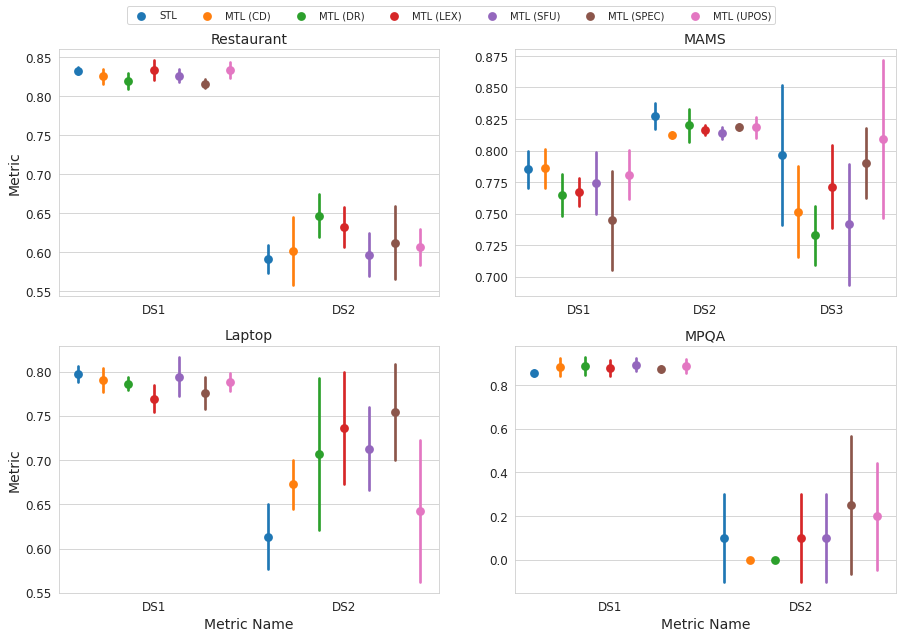

In [5]:
create_quad_plot(glove_val_df, ['DS1', 'DS2', 'DS3'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78cc69278>,
      dtype=object)

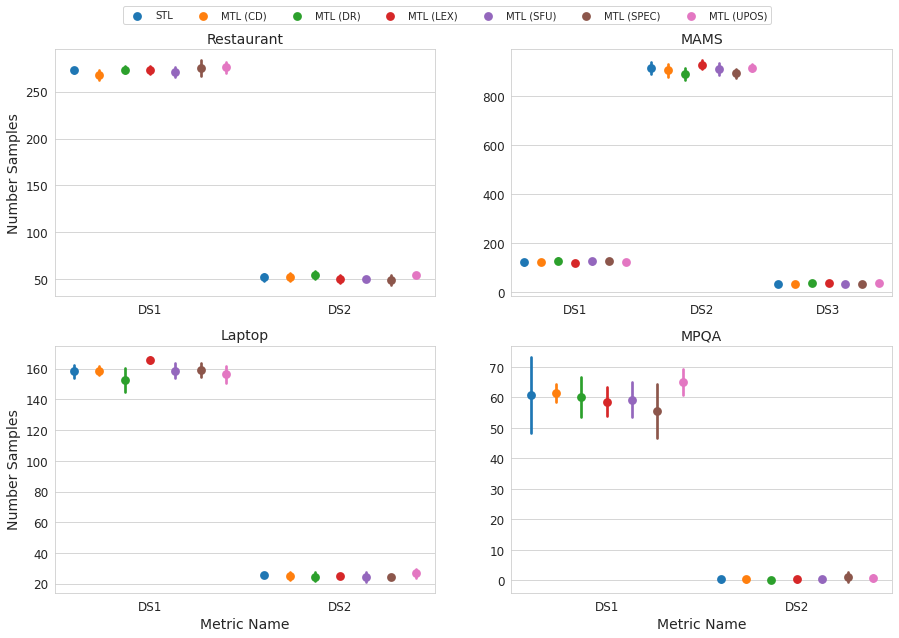

In [6]:
create_quad_plot(glove_val_df, ['DS1', 'DS2', 'DS3'], 'Number Samples')

### Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78c4d7a58>,
      dtype=object)

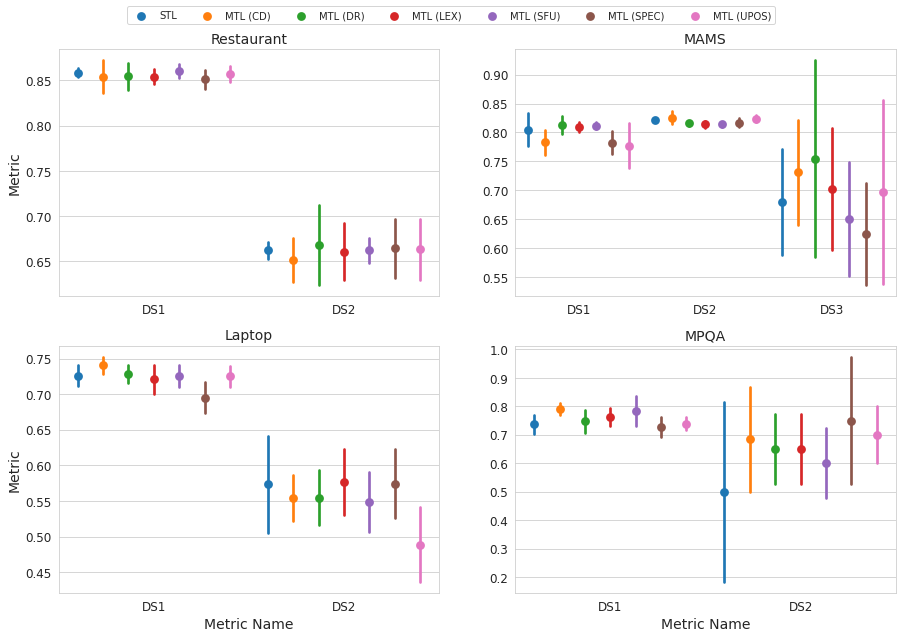

In [7]:
create_quad_plot(glove_test_df, ['DS1', 'DS2', 'DS3'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78c2522b0>,
      dtype=object)

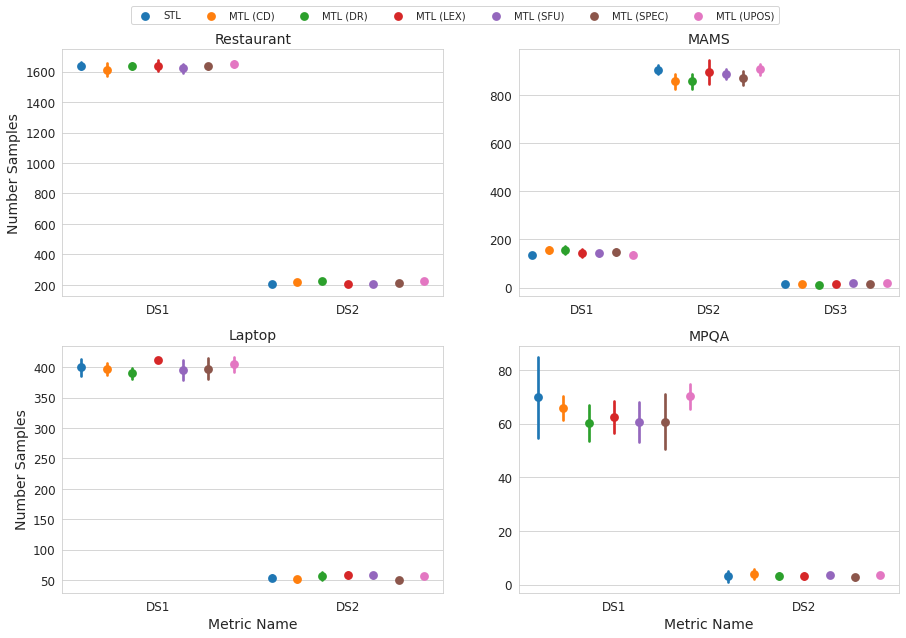

In [8]:
create_quad_plot(glove_test_df, ['DS1', 'DS2', 'DS3'], 'Number Samples')

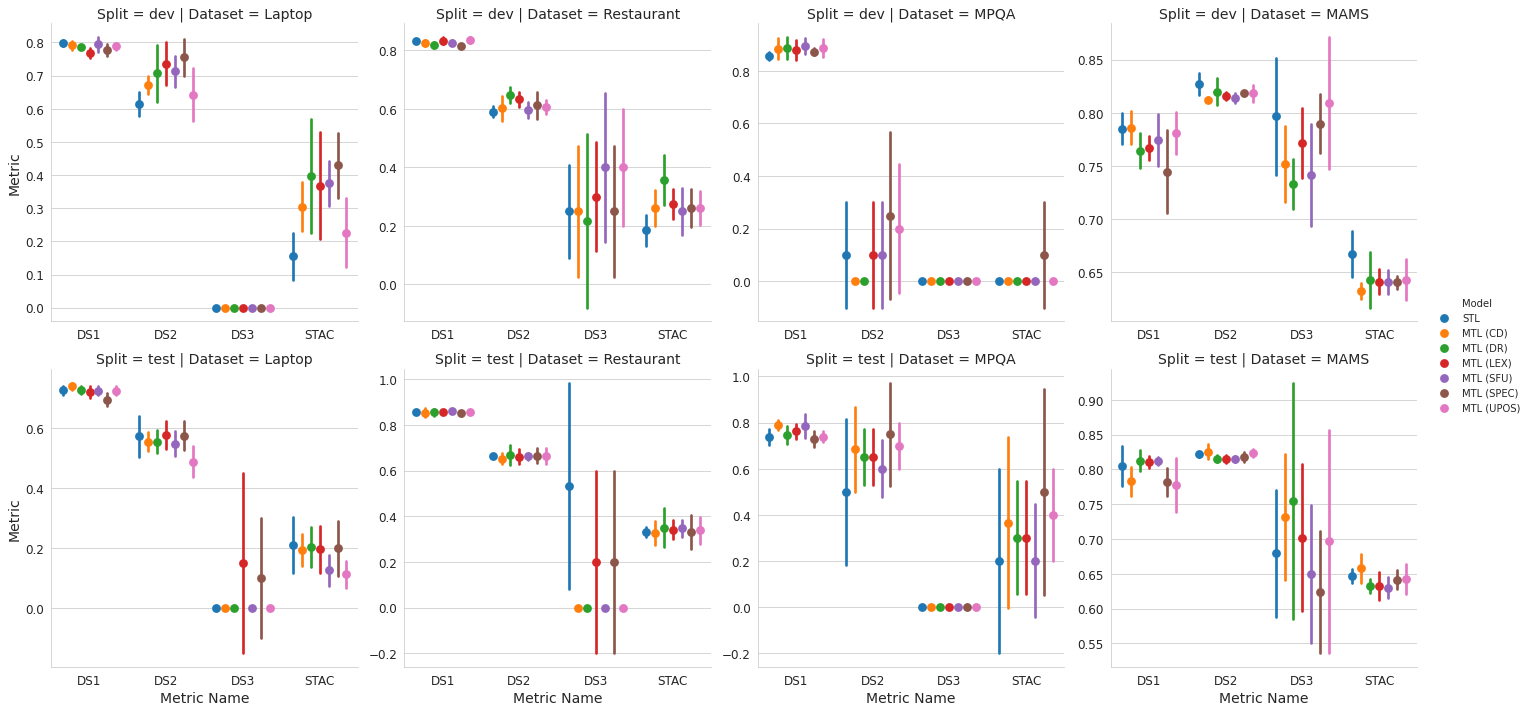

In [9]:
ax=sns.catplot(data=glove_df, hue='Model', row='Split', col='Dataset', x='Metric Name', 
               y='Metric', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.7)

## STAC
### Validation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78bbb5400>,
      dtype=object)

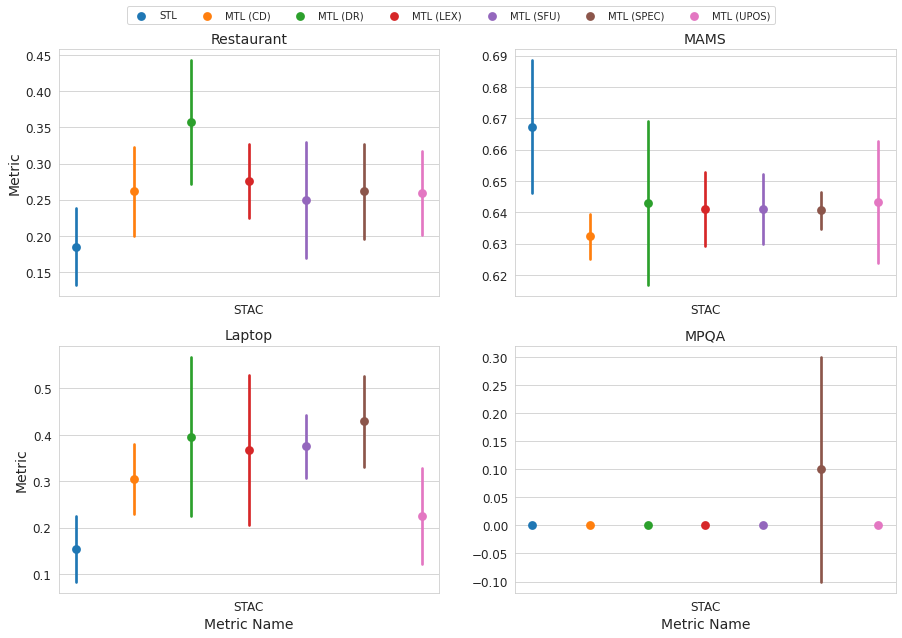

In [10]:
create_quad_plot(glove_val_df, ['STAC'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78a18cb38>,
      dtype=object)

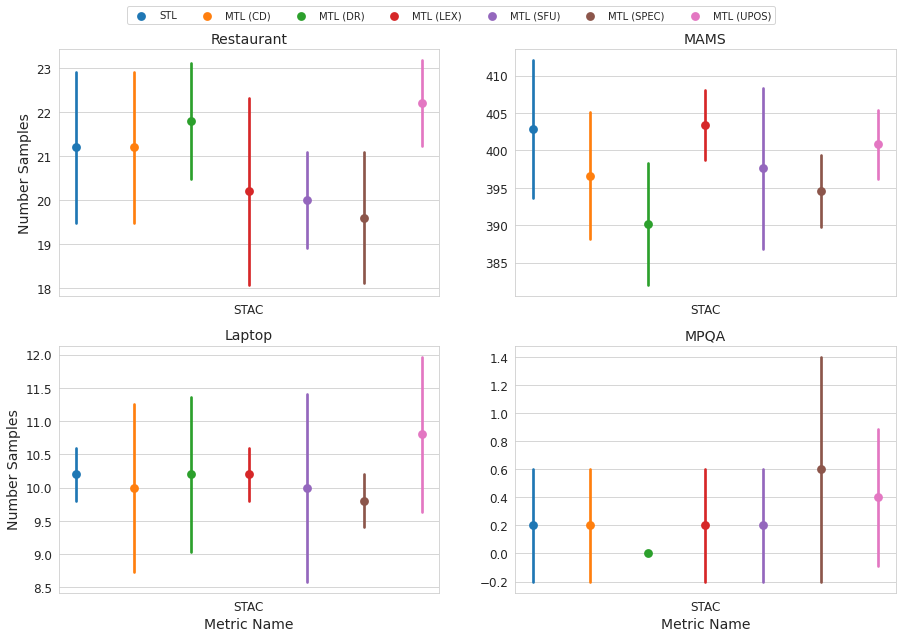

In [11]:
create_quad_plot(glove_val_df, ['STAC'], 'Number Samples')

### Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa789eb6080>,
      dtype=object)

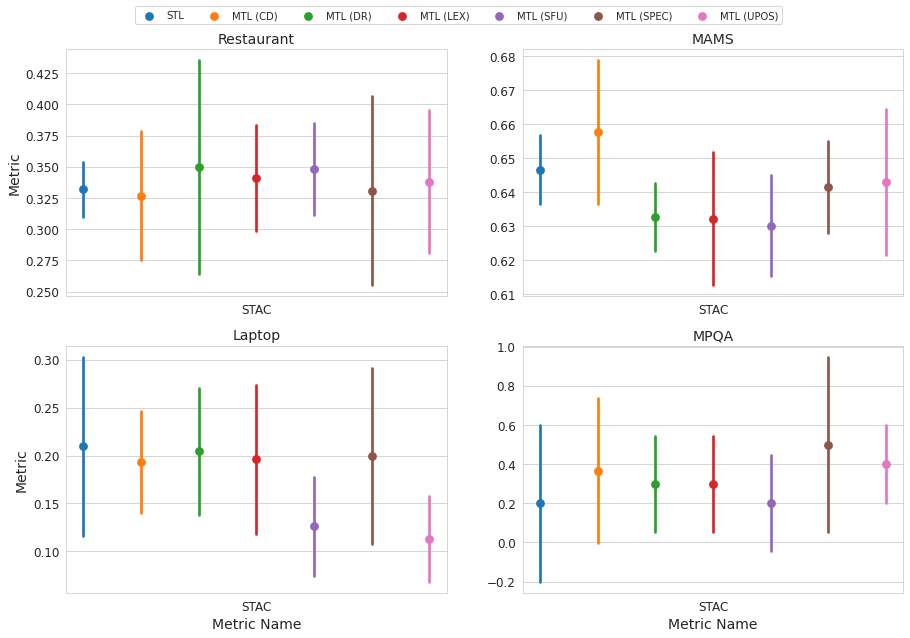

In [12]:
create_quad_plot(glove_test_df, ['STAC'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa789cf0b70>,
      dtype=object)

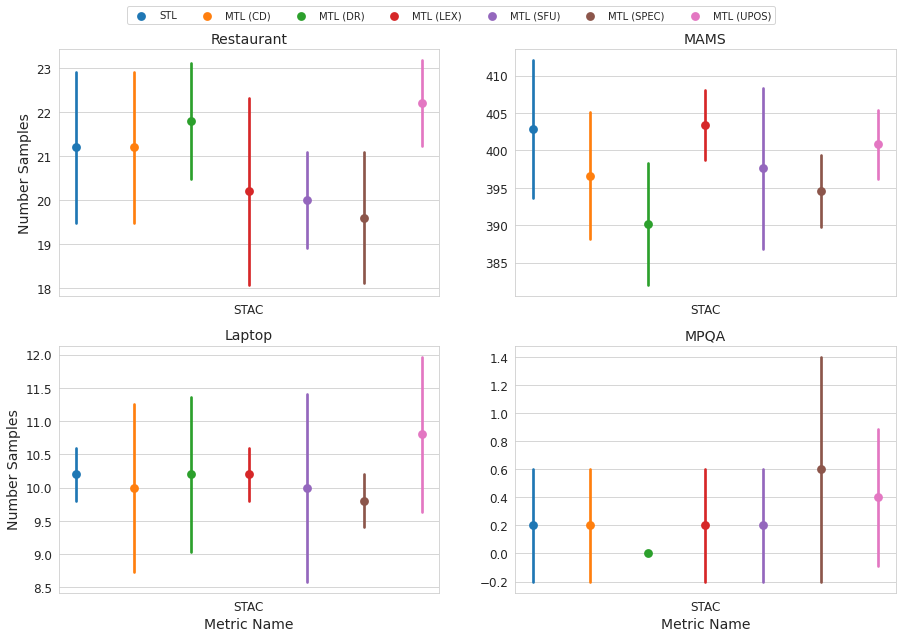

In [13]:
create_quad_plot(glove_val_df, ['STAC'], 'Number Samples')

# CWR
## Distinct Sentiment
### Validation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa789a80748>,
      dtype=object)

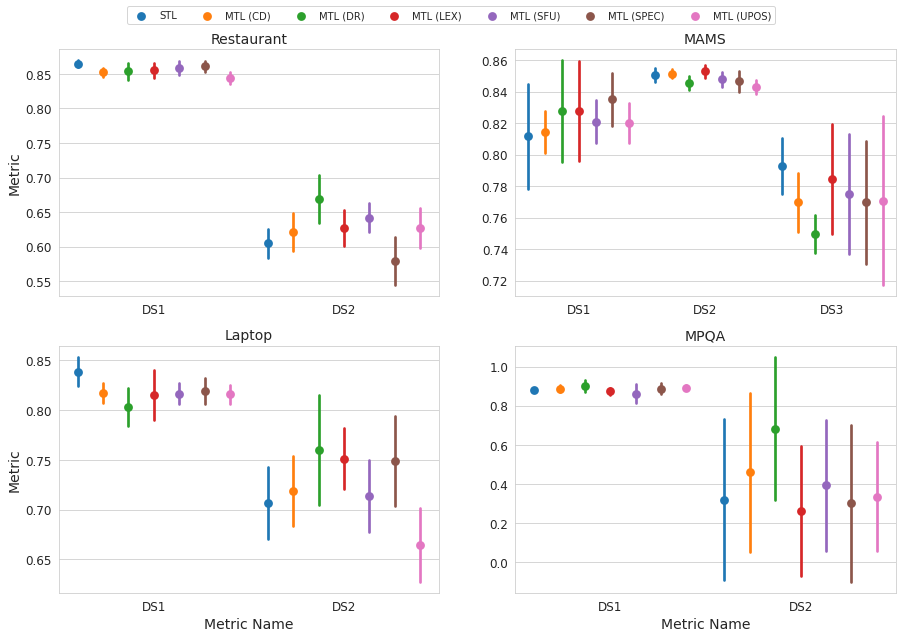

In [14]:
create_quad_plot(cwr_val_df, ['DS1', 'DS2', 'DS3'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7898e5128>,
      dtype=object)

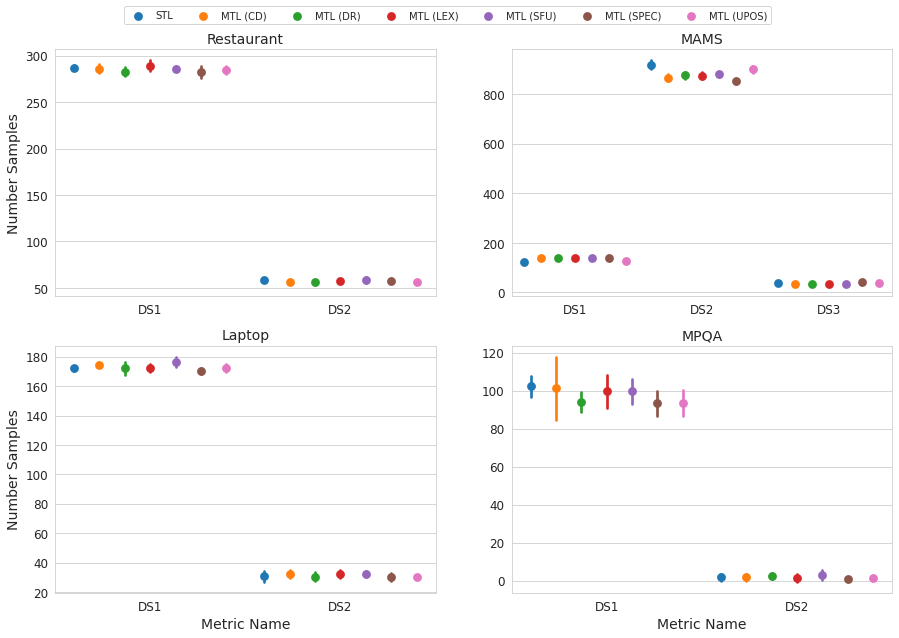

In [15]:
create_quad_plot(cwr_val_df, ['DS1', 'DS2', 'DS3'], 'Number Samples')

### Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa789dfd9b0>,
      dtype=object)

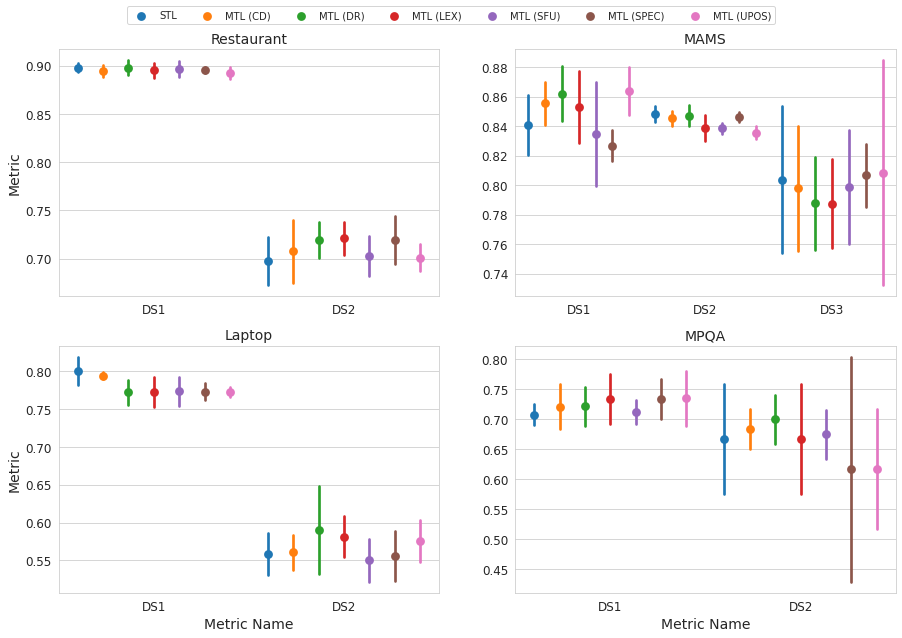

In [16]:
create_quad_plot(cwr_test_df, ['DS1', 'DS2', 'DS3'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa789403e80>,
      dtype=object)

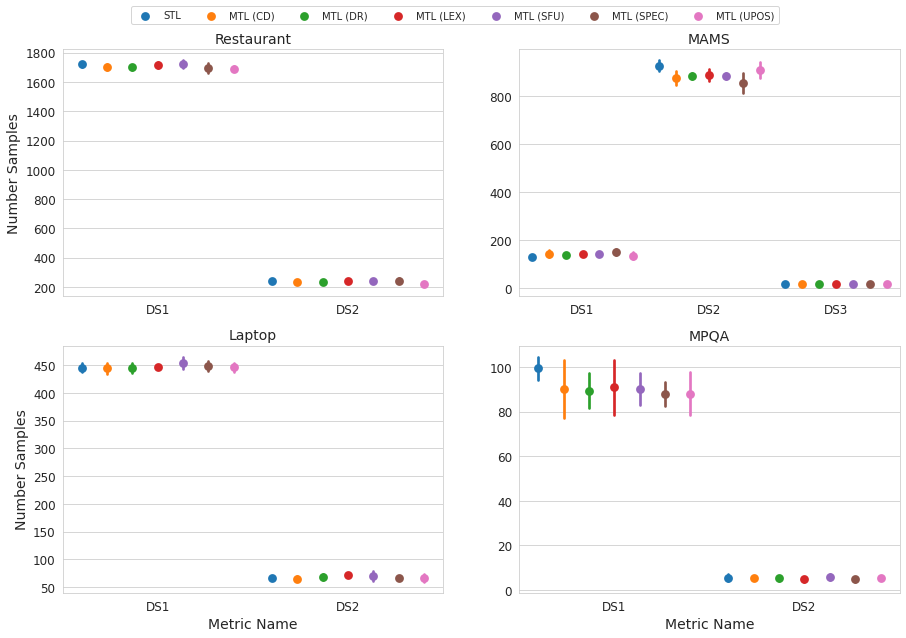

In [17]:
create_quad_plot(cwr_test_df, ['DS1', 'DS2', 'DS3'], 'Number Samples')

## STAC
### Validation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7891cdc18>,
      dtype=object)

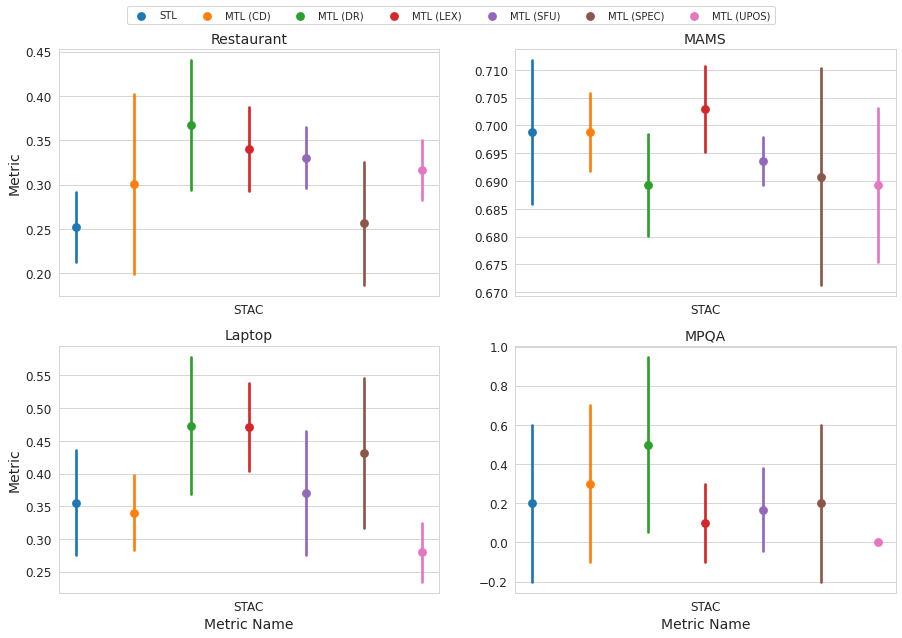

In [18]:
create_quad_plot(cwr_val_df, ['STAC'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa788fb2e10>,
      dtype=object)

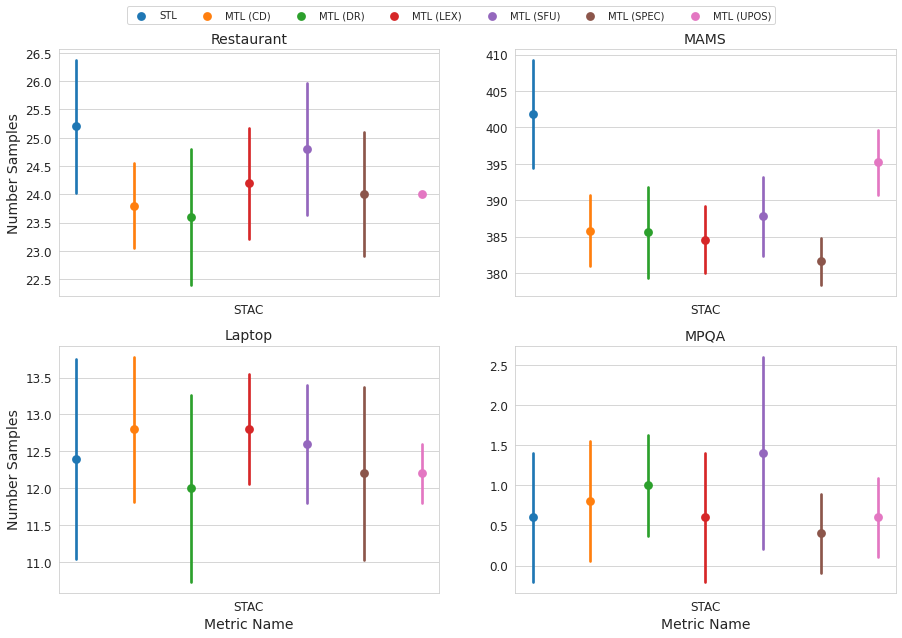

In [19]:
create_quad_plot(cwr_val_df, ['STAC'], 'Number Samples')

### Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa788dad5f8>,
      dtype=object)

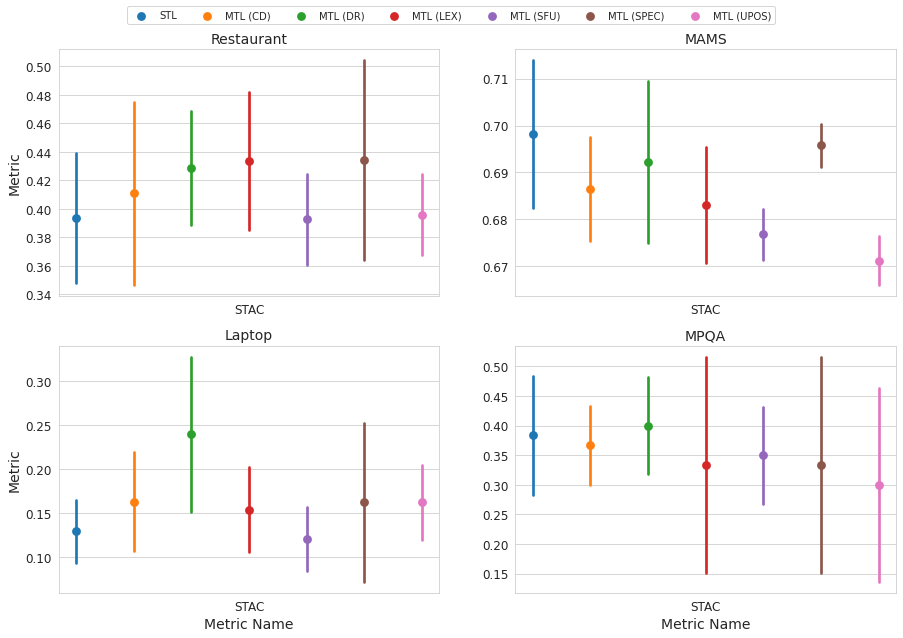

In [20]:
create_quad_plot(cwr_test_df, ['STAC'], 'Metric')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa788c912b0>,
      dtype=object)

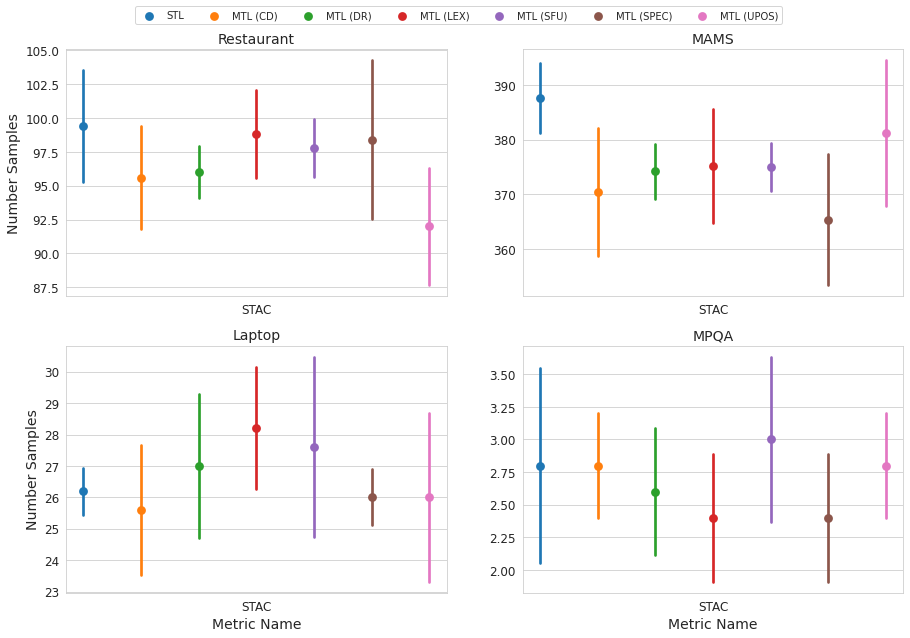

In [21]:
create_quad_plot(cwr_test_df, ['STAC'], 'Number Samples')